In [1]:
import cv2
import matplotlib.pyplot as plt
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil

import numpy as np
from sklearn.metrics import accuracy_score

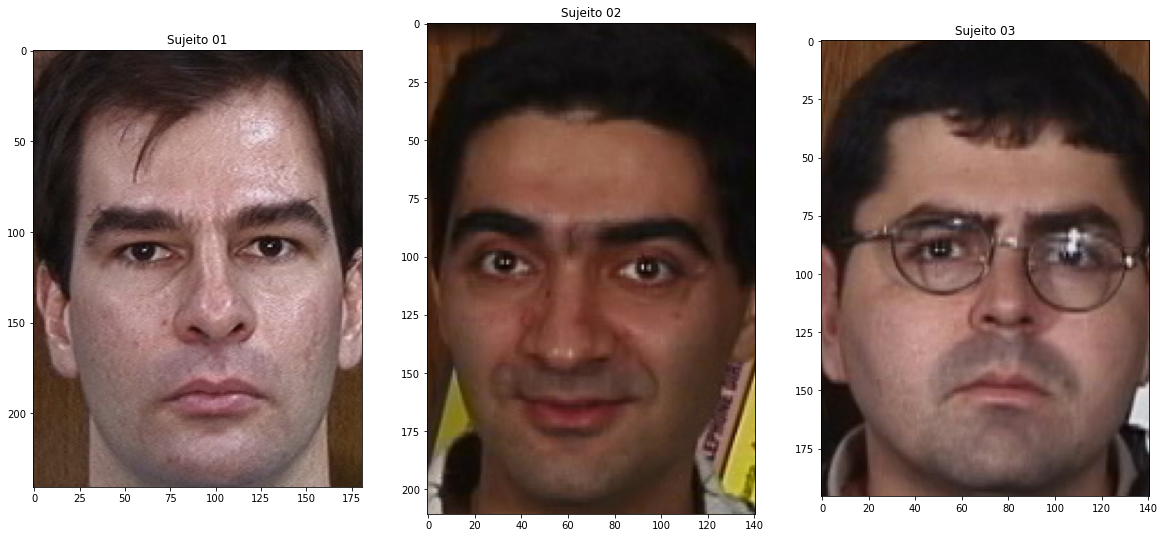

In [2]:
# 15 fotos de cada sujeito
imagem_face_1 = cv2.imread("imagens/cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_RGB2BGR)
imagem_face_2 = cv2.imread("imagens/cropped_faces/s02_01.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_RGB2BGR)
imagem_face_3 = cv2.imread("imagens/cropped_faces/s03_01.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(20,10))
# determinar o n de subgraficos, ou subplot
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1)
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2)
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3)

Observe que as imagens possuem alturas diferentes

In [3]:
imagem_face_1.shape

(241, 181, 3)

In [4]:
imagem_face_2.shape

(211, 141, 3)

In [5]:
imagem_face_3.shape

(196, 141, 3)

# Observe que as imagens possuem alturas diferentes, portanto vamos normalizá-las

Cada sujeito tem 15 fotos, parte das fotos será utilizada para treinamento, as outras, para avaliação. Vamos organizar as fotos de modo a dividí-las conforme

In [6]:
# definir pasta q contem as imagens da georgiatech
faces_caminho = "imagens/cropped_faces/"
# criar uma lista com todos os arquivos de imagens na pasta
lista_arq_faces = [ f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [7]:
lista_arq_faces[0]

's23_06.jpg'

In [8]:
len(lista_arq_faces)

750

In [9]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

# criar as pastas caso não exista
if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [10]:
# Definir função para redimensionamento das imagens (hardcoded para 200x200 pixels)
def padroniza_imagem(imagem_caminho):
    # mas n vai ficar achatado?
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    # arbitrar um tamanho de 200 x 200
    # o algoritmo de interpolação escolhido é lanczOS4
    imagem = cv2.resize(imagem, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [11]:
# pupular listas de arquivos de treino e testes
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [12]:
lista_faces_treino[0]

's23_06.jpg'

In [13]:
lista_faces_teste[0]

's23_12.jpg'

In [14]:
dados_treinamento, sujeitos = [], []

In [15]:
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padroniza_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [16]:
#numero de imagens de treinamento
len(dados_treinamento)

500

In [17]:
#Numero de sujeitos
len(sujeitos)

500

In [18]:
# agora fazendo o mesmo com as imafens de teste
dados_teste, sujeitos_teste = [], []

In [19]:
for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padroniza_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [20]:
#numero de imagens de teste
len(dados_teste)

250

In [21]:
#Numero de sujeitos de teste
len(sujeitos_teste)

250

Text(0.5, 1.0, '0')

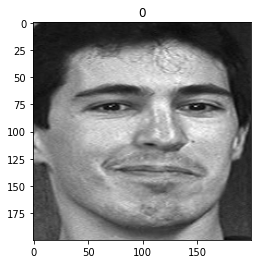

In [22]:
# Inspencionanto o sijeito 0
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

Text(0.5, 1.0, '23')

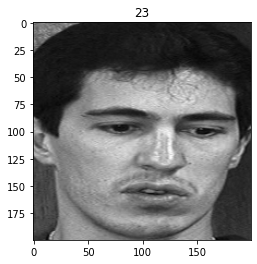

In [23]:
# Inspencionanto o sijeito 0
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeitos_teste[0])

## Observação Randômica
O processo de cadastro de face da apple, sony etc pede para você mover seu rosto em diversas direções enquanto sobrepõe um gráfico no seu rosto para orientar o processo. Este gráfico é sobreposto através do rastreamento do seu rosto (usando o processoa de  cascata de Haar, por exemplo) e projeção do gráfico enquanto várias fotos do seu rosto são tiradas de vários ângulos. 

# Trabalhando com os algoritmos de identificação de faces

In [24]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

## Algoritmo EingenFaces

In [25]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

In [26]:
# treinando os modelos utilizando as imagens como base
modelo_eingenfaces.train(dados_treinamento, sujeitos)

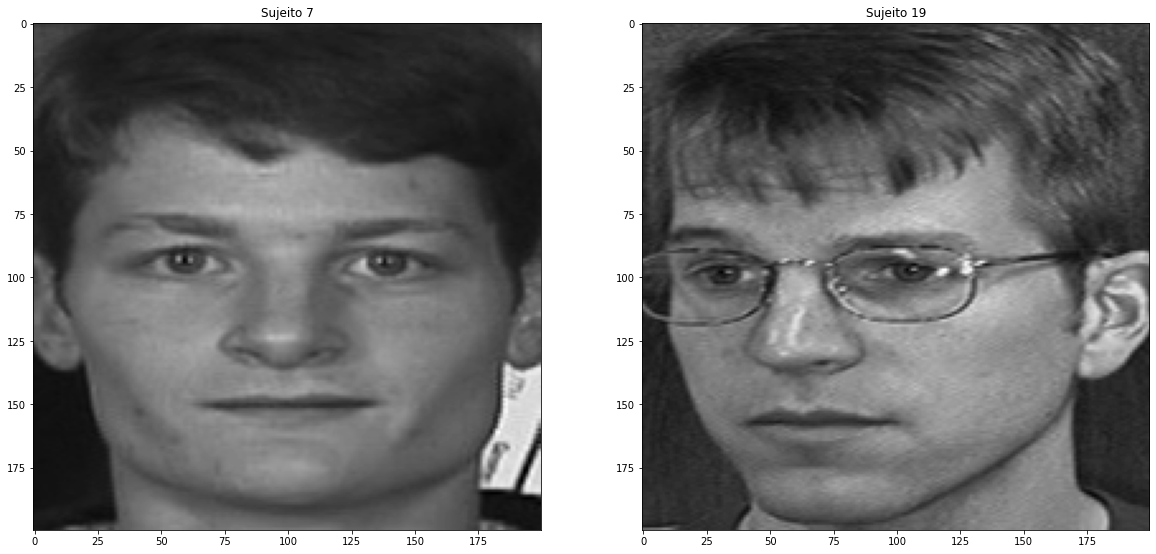

In [27]:
# Verificar se o modelo é capaz de identificar o mesmo sujeito
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[6]))
plt.imshow(dados_teste[6], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[7]))
plt.imshow(dados_teste[7], cmap="gray")

O sujeito 7 está no index 6 da lista  de teste.
O sujeito 19 está no index 7 da lista  de teste.

In [28]:
# Fazer a predição do sujeito utilizando-se as imagens de teste so sujeito 7 (index 6 na lista)
predicao = modelo_eingenfaces.predict(dados_teste[6])
predicao

(7, 4050.909029927302)

In [29]:
# Fazer a predição do sujeito utilizando-se as imagens de teste so sujeito 19 (index 7 na lista)
predicao = modelo_eingenfaces.predict(dados_teste[7])
predicao

(19, 3543.763732685472)

### Resultado
O modelo criado detectou corretamente que a imagem de teste 6 se refere ao sujeito 7, e que a imagem 7 se refere ao sujeito 19. A distância no plano de faces foi de 4050.909029927302 e 3543.763732685472, respectivamente


## Algotitmo Fisherfaces
Maximiza componentes extraclasse para facilitar a identificação pelo classificador.

In [30]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [31]:
modelo_fisherfaces.train(dados_treinamento, sujeitos)

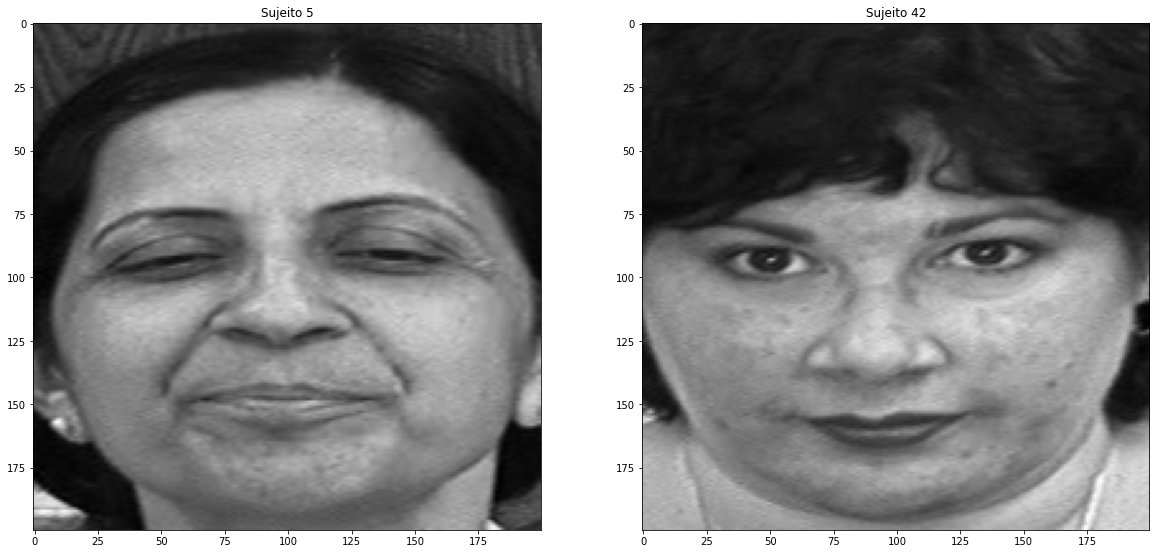

In [32]:
# Verificar se o modelo é capaz de identificar o mesmo sujeito
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[13]))
plt.imshow(dados_teste[13], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[19]))
plt.imshow(dados_teste[19], cmap="gray")

In [33]:
predicao = modelo_fisherfaces.predict(dados_teste[13])
predicao

(5, 1155.6965169307248)

In [34]:
predicao = modelo_fisherfaces.predict(dados_teste[19])
predicao

(42, 1127.7281810622874)

### Resultado com FisherFaces
O modelo criado detectou corretamente que a imagem de teste 13 se refere ao sujeito 5, e que a imagem 19 se refere ao sujeito 42. A distância no plano de faces foi de 1155.6965169307248 e 1127.7281810622874, respectivamente,um pouco menor que o EingenFaces



## Algoritmo LBPH

In [35]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [36]:
modelo_lbph.train(dados_treinamento,sujeitos)

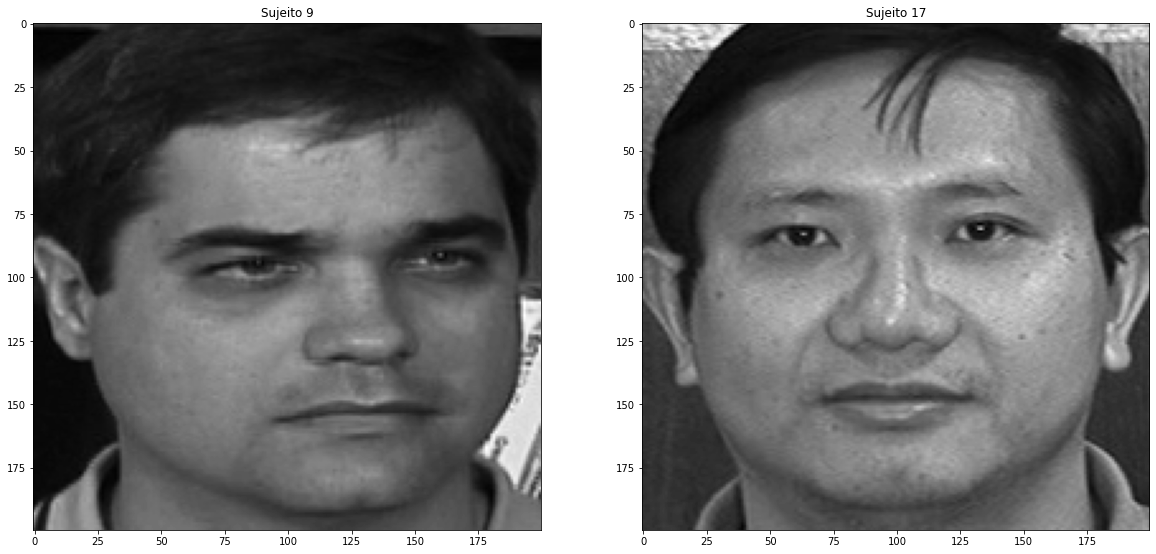

In [37]:
# Verificar se o modelo é capaz de identificar o mesmo sujeito
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[21]))
plt.imshow(dados_teste[21], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[27]))
plt.imshow(dados_teste[27], cmap="gray")

In [38]:
predicao = modelo_lbph.predict(dados_teste[21])
predicao

(9, 38.72438311678069)

In [39]:
predicao = modelo_lbph.predict(dados_teste[27])
predicao

(17, 37.604270261531475)

### Resultado do algoritmo LBPH
O modelo criado detectou corretamente que a imagem de teste 21 se refere ao sujeito 9, e que a imagem 27 se refere ao sujeito 17. A distância no plano de faces foi de 38.72438311678069 e 37.604270261531475, respectivamente, resultados bem melhores que os algoritmos anteriores




# Contabilização da acurácia

Pegar o resultado de predição dos algoritmos e comparar a acurácias de um com o outro

## Eingenfaces

In [40]:
y_pred_eingenfaces = []

In [41]:
for item in dados_teste:
    # criar lista com acurácia de predição dos dados de teste
    y_pred_eingenfaces.append(modelo_eingenfaces.predict(item)[0])

In [42]:
acuracia_eingenfaces = accuracy_score(sujeitos_teste, y_pred_eingenfaces)
acuracia_eingenfaces

0.724

A acurária do modelo utilizando o algoritmo eingenfaces foi de 72,4 %

## Fisherfaces

In [43]:
y_pred_fisherfaces = []

In [44]:
for item in dados_teste:
    # criar lista com acurácia de predição dos dados de teste
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])

In [45]:
acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)
acuracia_fisherfaces

0.52

A acurária do modelo utilizando o algoritmo fisherfaces foi de 52% 

### LBPH

In [46]:
y_pred_lbph = []

In [47]:
for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])

In [48]:
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)
acuracia_lbph

0.792

A acurária do modelo utilizando o algoritmo LBPH foi de 79,2 %, a maior entre os algorítmos avaliados aqui.